In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from numpy import array
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df1=df[['date','close']]

In [ ]:
df1.set_index('date',inplace=True)

In [ ]:
df1.head()

,close
date,
2015-05-27 00:00:00+00:00,132.045
2015-05-28 00:00:00+00:00,131.780
2015-05-29 00:00:00+00:00,130.280
2015-06-01 00:00:00+00:00,130.535
2015-06-02 00:00:00+00:00,129.960


<Axes: xlabel='date'>

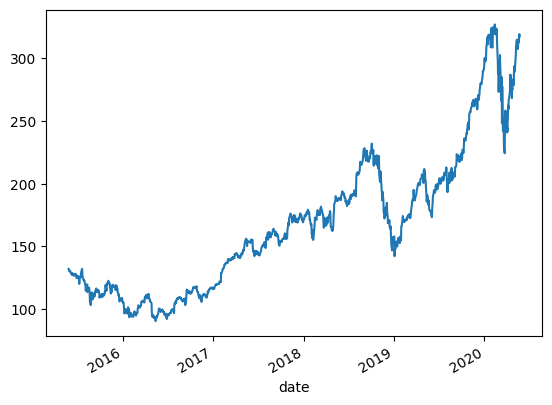

In [ ]:
df1['close'].plot()

## Dickey Fuller Test and Correlation Analysis

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df1['close'])

ADF Statistics: -0.10012966467734433
p- value: 0.9494256168598445
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df1['close_first_diff']=df1['close']-df1['close'].shift(1)

/tmp/ipython-input-1152603254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['close_first_diff']=df1['close']-df1['close'].shift(1)


In [ ]:
df1.head()

,close,close_first_diff
date,,
2015-05-27 00:00:00+00:00,132.045,NaN
2015-05-28 00:00:00+00:00,131.780,-0.265
2015-05-29 00:00:00+00:00,130.280,-1.500
2015-06-01 00:00:00+00:00,130.535,0.255
2015-06-02 00:00:00+00:00,129.960,-0.575


In [ ]:
adf_test(df1['close_first_diff'].dropna())

ADF Statistics: -6.239529846021801
p- value: 4.7344489286629614e-08
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

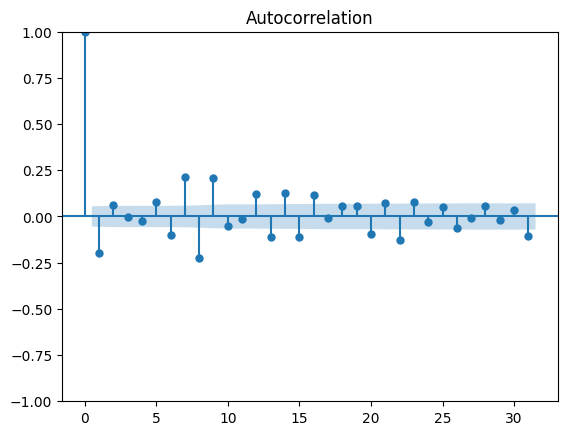

In [ ]:
acf=plot_acf(df1['close_first_diff'].dropna())

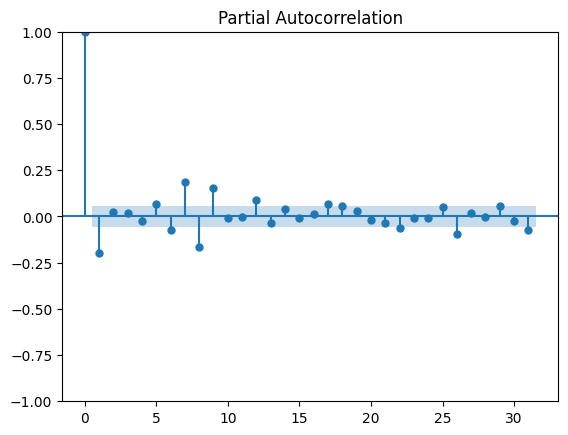

In [ ]:
pacf=plot_pacf(df1['close_first_diff'].dropna())

In [ ]:
df1['close_second_diff']=df1['close_first_diff']-df1['close_first_diff'].shift(1)

/tmp/ipython-input-509419514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['close_second_diff']=df1['close_first_diff']-df1['close_first_diff'].shift(1)


In [ ]:
adf_test(df1['close_second_diff'].dropna())

ADF Statistics: -15.355180414387721
p- value: 3.674916463434071e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


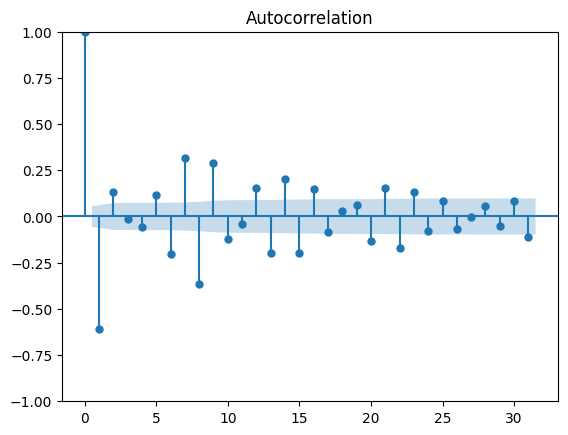

In [ ]:
acf=plot_acf(df1['close_second_diff'].dropna())

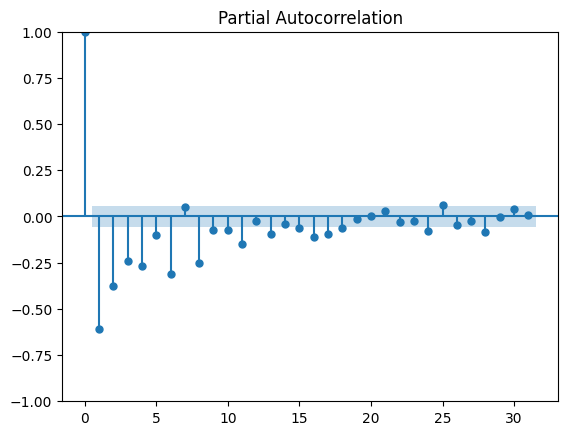

In [ ]:
pacf=plot_pacf(df1['close_second_diff'].dropna())

## Preparing data

In [ ]:
training_size=int(len(df1)*0.65)

In [ ]:
test_size=len(df1)-training_size

In [ ]:
print(training_size,test_size)

817 441


In [ ]:
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]

In [ ]:
train_data.shape

(817, 3)

In [ ]:
test_data.shape

(441, 3)

In [ ]:
train_data

,close,close_first_diff,close_second_diff
date,,,
2015-05-27 00:00:00+00:00,132.045,NaN,NaN
2015-05-28 00:00:00+00:00,131.780,-0.265,NaN
2015-05-29 00:00:00+00:00,130.280,-1.500,-1.235
2015-06-01 00:00:00+00:00,130.535,0.255,1.755
2015-06-02 00:00:00+00:00,129.960,-0.575,-0.830
...,...,...,...
2018-08-15 00:00:00+00:00,210.240,0.490,-0.390
2018-08-16 00:00:00+00:00,213.320,3.080,2.590
2018-08-17 00:00:00+00:00,217.580,4.260,1.180


In [ ]:
test_data

,close,close_first_diff,close_second_diff
date,,,
2018-08-22 00:00:00+00:00,215.05,0.01,0.43
2018-08-23 00:00:00+00:00,215.49,0.44,0.43
2018-08-24 00:00:00+00:00,216.16,0.67,0.23
2018-08-27 00:00:00+00:00,217.94,1.78,1.11
2018-08-28 00:00:00+00:00,219.70,1.76,-0.02
...,...,...,...
2020-05-18 00:00:00+00:00,314.96,7.25,9.08
2020-05-19 00:00:00+00:00,313.14,-1.82,-9.07
2020-05-20 00:00:00+00:00,319.23,6.09,7.91


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

## ARIMA

In [ ]:
model_ARIMA=ARIMA(train_data['close'],order=(6,2,2))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit=model_ARIMA.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  817
Model:                 ARIMA(6, 2, 2)   Log Likelihood               -1684.263
Date:                Sat, 16 Aug 2025   AIC                           3386.526
Time:                        06:45:50   BIC                           3428.854
Sample:                             0   HQIC                          3402.772
                                - 817                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7392      0.138     -5.353      0.000      -1.010      -0.469
ar.L2          0.0434      0.036      1.202      0.229      -0.027       0.114
ar.L3         -0.0312      0.036     -0.877      0.381      -0.101       0.038
ar.L4          0.0044      0.036      0.122      0.903      -0.066       0.075
ar.L5          0.0178      0.042      0.426      0.670      -0.064       0.100
ar.L6         -0.0459      0.035     -1.328      0.184      -0.114       0.022
ma.L1         -0.1749      0.135     -1.296      0.195      -0.439       0.090
ma.L2         -0.8157      0.135     -6.028      0.000      -1.081      -0.551
sigma2         3.6316      0.115     31.713      0.000       3.407       3.856
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               406.11
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred= model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
pred = pd.Series(pred.values, index=test_data.index)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
residuals = test_data['close'] - pred

In [ ]:
residuals

,0
date,
2018-08-22 00:00:00+00:00,-0.325955
2018-08-23 00:00:00+00:00,-0.176898
2018-08-24 00:00:00+00:00,0.314786
2018-08-27 00:00:00+00:00,2.019056
2018-08-28 00:00:00+00:00,3.304629
...,...
2020-05-18 00:00:00+00:00,-10.049053
2020-05-19 00:00:00+00:00,-12.120650
2020-05-20 00:00:00+00:00,-6.282247


In [ ]:
pred

,0
date,
2018-08-22 00:00:00+00:00,215.375955
2018-08-23 00:00:00+00:00,215.666898
2018-08-24 00:00:00+00:00,215.845214
2018-08-27 00:00:00+00:00,215.920944
2018-08-28 00:00:00+00:00,216.395371
...,...
2020-05-18 00:00:00+00:00,325.009053
2020-05-19 00:00:00+00:00,325.260650
2020-05-20 00:00:00+00:00,325.512247


<Axes: ylabel='Density'>

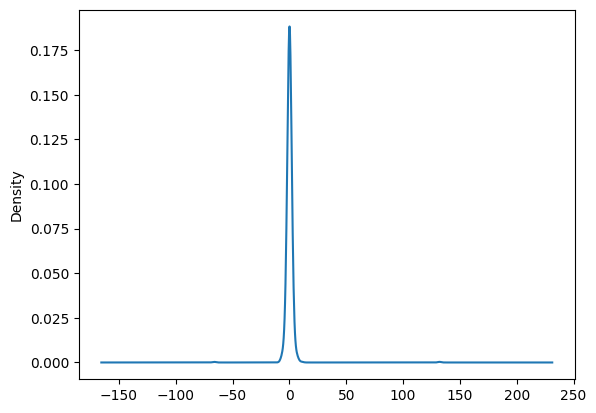

In [ ]:
model_fit.resid.plot(kind='kde')

/tmp/ipython-input-3460581341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='date'>

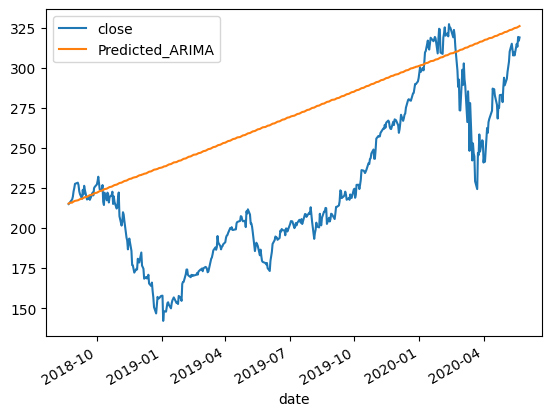

In [ ]:
test_data['Predicted_ARIMA']=pred
test_data[['close','Predicted_ARIMA']].plot()

<Axes: xlabel='date'>

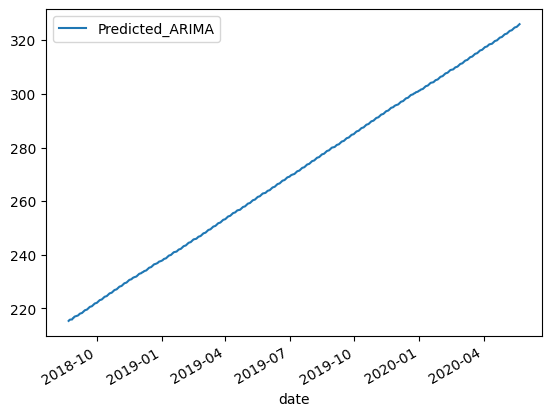

In [ ]:
test_data[['Predicted_ARIMA']].plot()

## SARIMAX

In [ ]:
model = SARIMAX(
    train_data['close'],
    order=(6, 0, 2),                 # ARIMA(p,d,q)
    seasonal_order=(0,2,0, 5),     # (P,D,Q,s)
    enforce_stationarity=False,
    enforce_invertibility=False
)
res = model.fit(disp=False)
print(res.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                  817
Model:             SARIMAX(6, 0, 2)x(0, 2, [], 5)   Log Likelihood               -2077.801
Date:                            Sat, 16 Aug 2025   AIC                           4173.603
Time:                                    08:34:51   BIC                           4215.775
Sample:                                         0   HQIC                          4189.802
                                            - 817                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6762      0.069      9.826      0.000       0.541       0.811
ar.L2         -0.0191      0.045   

In [ ]:
# 2) Forecast on the original scale
# fc = res.forecast(steps=len(test_data))
# fc = pd.Series(fc, index=test_data.index)
pred= res.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
pred = pd.Series(pred.values, index=test_data.index)

test_data['Predicted_SARIMAX']=pred

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipython-input-3396057442.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX']=pred


<Axes: xlabel='date'>

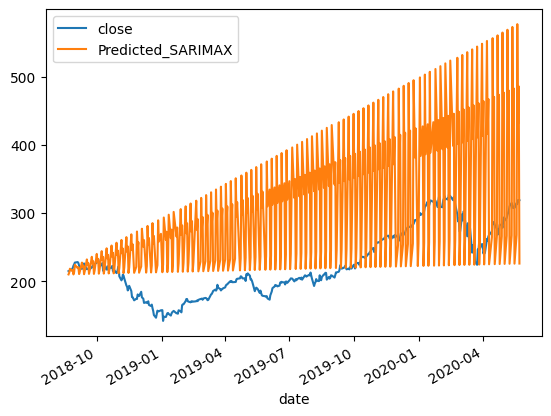

In [ ]:
test_data[['close','Predicted_SARIMAX']].plot()

## FB PROPHET

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3hs_h7o/jmo2yhhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3hs_h7o/qdcuul6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96373', 'data', 'file=/tmp/tmpx3hs_h7o/jmo2yhhp.json', 'init=/tmp/tmpx3hs_h7o/qdcuul6w.json', 'output', 'file=/tmp/tmpx3hs_h7o/prophet_model0h2tju0m/prophet_model-20250816082509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:25:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:25:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


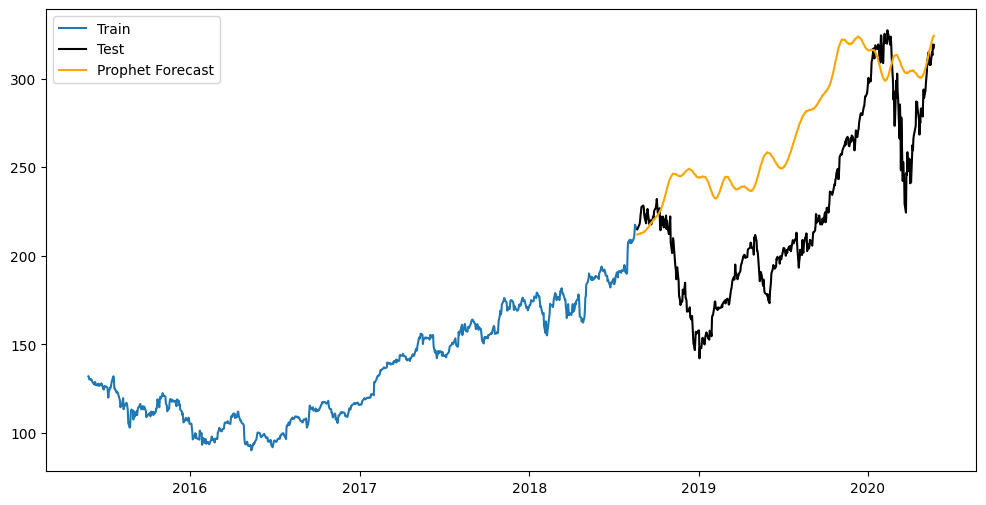

In [ ]:
from prophet import Prophet

train_df = train_data.reset_index()[['date', 'close']]
train_df.columns = ['ds', 'y']

test_df = test_data.reset_index()[['date', 'close']]
test_df.columns = ['ds', 'y']
train_df['ds'] = pd.to_datetime(train_df['ds']).dt.tz_localize(None)
test_df['ds']  = pd.to_datetime(test_df['ds']).dt.tz_localize(None)

m = Prophet(
    seasonality_mode='multiplicative'
)

m.fit(train_df)

forecast = m.predict(test_df)

# Align forecast with test index
fc = forecast[['ds', 'yhat']].set_index('ds').loc[test_df['ds']]

plt.figure(figsize=(12,6))
plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Test', color='black')
plt.plot(fc.index, fc['yhat'], label='Prophet Forecast', color='orange')
plt.legend()
plt.show()


In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

INFO:prophet:Making 1 forecasts with cutoffs between 2017-08-21 00:00:00 and 2017-08-21 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3hs_h7o/ewxpkna2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3hs_h7o/_y16cs3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41902', 'data', 'file=/tmp/tmpx3hs_h7o/ewxpkna2.json', 'init=/tmp/tmpx3hs_h7o/_y16cs3v.json', 'output', 'file=/tmp/tmpx3hs_h7o/prophet_modelylb8zqxv/prophet_model-20250816082518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:25:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:25:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  horizon         mse       rmse       mae      mape     mdape     smape  \
0 36 days   76.968021   8.773142  6.912572  0.044092  0.034579  0.042844   
1 37 days   86.947949   9.324588  7.456686  0.047641  0.037718  0.046185   
2 38 days   97.419599   9.870137  8.016055  0.051316  0.038110  0.049639   
3 39 days  106.711790  10.330140  8.541460  0.054745  0.039219  0.052873   
4 42 days  116.140170  10.776835  9.048045  0.058067  0.041097  0.055992   

   coverage  
0      0.36  
1      0.32  
2      0.28  
3      0.24  
4      0.24  


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


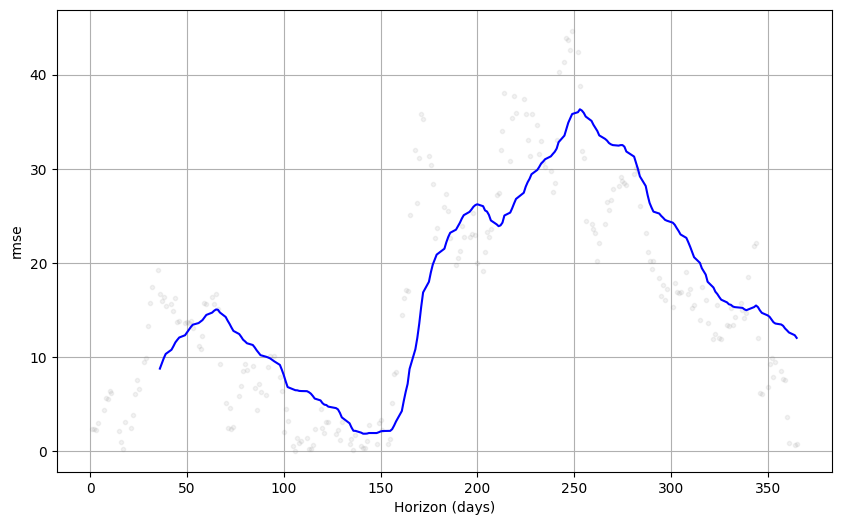

In [ ]:
from prophet.plot import plot_cross_validation_metric

# Plot RMSE vs horizon
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## Conclusion
For stock price forecasting, all three have limitations because stocks are non-stationary, noisy, and influenced by external factors (macro news, earnings, sentiment, etc.). Traditional time series models (ARIMA/SARIMAX/Prophet) are good for trend analysis, but not for trading-level prediction.